In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
set_session(sess)

C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\James_Dev_Account\anaconda3\envs\honours-keras-2.1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 

In [2]:
"""

This is for B/D estimation of galaxies by CNN,
By Kenji Bekki, on 2018/3/30
For test only.

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
#batch_size = 200
#num_classes = 3
#epochs = 1
#nb_epoch=epochs

n_mesh=50
#n_mesh=20

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh

#input_shape = (img_rows, img_cols, 1)

# For output the galaxy classification results
f1=open('test27.out','w')

# This is for simlation data sets
with open('2dft.dat') as f:
  lines=f.readlines()

#nmodel0=int(input('Input the total number of images per model '))
#nmodel=nmodel0
nmodel=1000
print('nmodel',nmodel)

#nmodel=30000

x_train=np.zeros((nmodel,n_mesh3))
x_test=np.zeros((nmodel,n_mesh3))
y_train=np.zeros(nmodel,dtype=np.int)
y_test=np.zeros(nmodel,dtype=np.int)



#y_test=np.zeros(nmodel)
#print(y_train)

# For 2D density map data
ibin=0
jbin=-1
for num,j in enumerate(lines):
  jbin=jbin+1
  tm=j.strip().split()
  x_train[ibin,jbin]=float(tm[0])
  x_test[ibin,jbin]=float(tm[0])
#  print('ibin,jbin',ibin,jbin)
  if jbin == n_mesh2:
    ibin+=1
    jbin=-1

ntest=ibin
print(ntest)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
#y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
#y_test =  keras.utils.np_utils.to_categorical(y_test, num_classes)


# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

y_vec=np.zeros(2)
#print(y_vec)

y_pred=loaded_model.predict(x_test)
print(y_pred[:ntest])

f1.write( str(ntest) + "\n" )

for i in range(ntest):
  for j in range(2):
   y_vec[j]=y_pred[i,j]
#  print(y_vec)
#  y_type=np.argmax(y_vec)
#  prob=y_vec[y_type]
   prob=y_vec[j]
   print('i=',i,'j',j,'B/D',prob)
#   f1.write( str(prob) +"\n" )
#  f1.write( str(y_type) + ' ' + str(prob) +"\n" )
  f1.write( str(y_vec[0]) + ' ' + str(y_vec[1]) +  "\n")
#  str(y_vec[1]) + "\n" )
#  str(y_vec[1]) + ' ' + str(y_vec[2]) + "\n" )
f1.flush()
#loaded_model.compile(loss=keras.losses.categorical_crossentropy,
#              optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])





9 j 1 B/D 7.642776966094971
i= 700 j 0 B/D 7.0029826164245605
i= 700 j 1 B/D 1.8870216608047485
i= 701 j 0 B/D 7.229538917541504
i= 701 j 1 B/D 1.8714277744293213
i= 702 j 0 B/D 7.073034763336182
i= 702 j 1 B/D 1.6880229711532593
i= 703 j 0 B/D 7.246905326843262
i= 703 j 1 B/D 1.7460523843765259
i= 704 j 0 B/D 6.82668399810791
i= 704 j 1 B/D 1.3065464496612549
i= 705 j 0 B/D 6.9446702003479
i= 705 j 1 B/D 1.437688946723938
i= 706 j 0 B/D 6.218565464019775
i= 706 j 1 B/D 1.3343942165374756
i= 707 j 0 B/D 6.70735502243042
i= 707 j 1 B/D 1.457393765449524
i= 708 j 0 B/D 6.410731315612793
i= 708 j 1 B/D 1.42186439037323
i= 709 j 0 B/D 6.3453216552734375
i= 709 j 1 B/D 1.2801016569137573
i= 710 j 0 B/D 6.291415214538574
i= 710 j 1 B/D 2.4661388397216797
i= 711 j 0 B/D 6.42435884475708
i= 711 j 1 B/D 2.4698314666748047
i= 712 j 0 B/D 6.711958885192871
i= 712 j 1 B/D 2.3121590614318848
i= 713 j 0 B/D 6.679538726806641
i= 713 j 1 B/D 2.3531599044799805
i= 714 j 0 B/D 6.426901340484619
i= 714 j

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial

In [4]:
pv = pd.read_csv('test27.out', sep=" ", skiprows=1, header=None, names=["fd", "Rd"]) #predicted fd and Rd values
tfdv = pd.read_csv('2dftn1.dat', header=None, names=["fd"]) #true fd values
tRdv = pd.read_csv('2dftn2.dat', header=None, names=["Rd"]) #true fd and Rd values

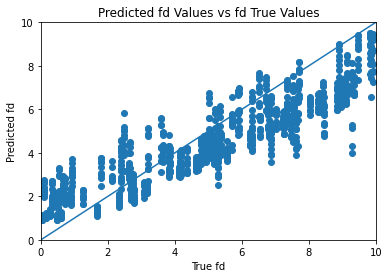

In [5]:
plt.scatter(tfdv, pv["fd"])
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10])
plt.title("Predicted fd Values vs fd True Values")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.show()

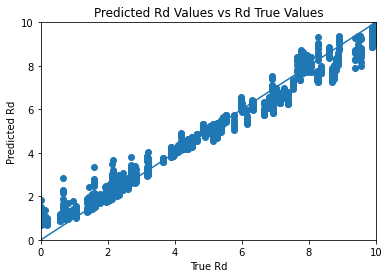

In [6]:
plt.scatter(tRdv, pv["Rd"])
plt.title("Predicted Rd Values vs Rd True Values")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0,10],[0,10])
plt.show()

In [7]:
tfdv_flat = tfdv.to_numpy().flatten()
pfdv_flat = pv["fd"].to_numpy().flatten()
tRdv_flat = tRdv.to_numpy().flatten()
pRdv_flat = pv["Rd"].to_numpy().flatten()

def cos_dis(u, v):
    return (1 - np.dot(u, v)/(np.linalg.norm(u)*np.linalg.norm(v)))

In [8]:
#scipy.spatial.distance.cosine(tfdv_flat, pfdv_flat)

In [9]:
from sklearn import metrics

binned_pfdv = pfdv_flat.reshape(-1, 10)
binned_tfdv = tfdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pfdv.shape[0])
for i in range(binned_pfdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pfdv[i], binned_tfdv[i]))

cor_cos_dis[0]

0.0030215505216927285

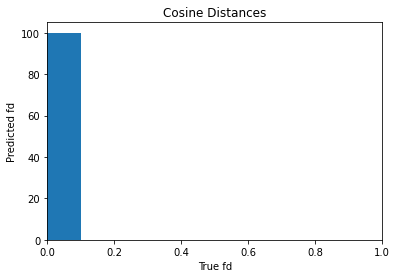

In [10]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True fd")
plt.ylabel("Predicted fd")
plt.xlim(0, 1)
plt.show()

In [11]:
binned_pRdv = pRdv_flat.reshape(-1, 10)
binned_tRdv = tRdv_flat.reshape(-1, 10)

cor_cos_dis = np.zeros(binned_pRdv.shape[0])
for i in range(binned_pRdv.shape[0]):
     cor_cos_dis[i] = (cos_dis(binned_pRdv[i], binned_tRdv[i]))

cor_cos_dis[0]

0.0004911261399122013

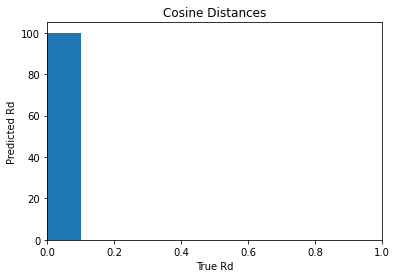

In [12]:
plt.hist(cor_cos_dis, bins=np.arange(0, 10, 0.1), histtype='stepfilled')
plt.title("Cosine Distances")
plt.xlabel("True Rd")
plt.ylabel("Predicted Rd")
plt.xlim(0, 1)
plt.show()

In [13]:
y = (np.histogram(cor_cos_dis, np.arange(0, 1.1, 0.1), weights=np.full(cor_cos_dis.shape, 1 / cor_cos_dis.shape[0]))[0])
x = np.arange(0.05, 1.05, 0.1)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


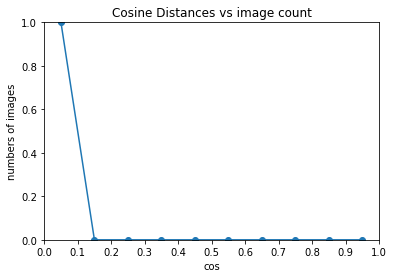

In [14]:
print(x)
print(y)
plt.scatter(x, y)
plt.plot(x, y)
plt.title("Cosine Distances vs image count")
plt.xlabel("cos")
plt.ylabel("numbers of images")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()

In [15]:
cos_dis_arr = np.zeros(pfdv_flat.shape[0])

pv_arr = pv.to_numpy()
cv_arr = np.c_[tfdv_flat, tRdv_flat]

for i in range(pfdv_flat.shape[0]):
     cos_dis_arr[i] = (cos_dis(cv_arr[i] ,pv_arr[i]))
cos_dis_arr[10]

0.03220607090125327

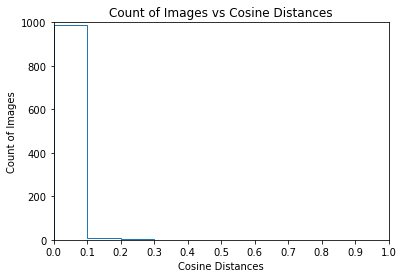

In [16]:
plt.hist(cos_dis_arr, bins=np.arange(0, 10, 0.1), histtype='step')
plt.title("Count of Images vs Cosine Distances")
plt.ylabel("Count of Images")
plt.xlabel("Cosine Distances")
plt.xlim(0, 1)
plt.ylim(0, 1000)
plt.xticks(np.arange(0, 1 + 0.1, 0.1))
plt.show()